## Accuracy after removing a couple of features: 'Solidity' and 'Extent'

In [1]:
# Load Libraries
import pandas as pd
import numpy as np

# Set random seed
np.random.seed(42)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Load Data

In [2]:
# Load data to a DataFrame
beanDF = pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [3]:
# Get a look at the data
beanDF.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# Look at the shape of the DataFrame
beanDF.shape

(13611, 17)

In [5]:
# See the relative numbers of each target category
beanDF.value_counts('Class')

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
dtype: int64

In [6]:
# Drop least useful features
beanDF.drop(columns=['Extent', 'Solidity'], inplace=True)

## Split Training and Testing Data

In [7]:
# Load libraries
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# Set up features target sets
X = beanDF[beanDF.columns[:-1]]
y = beanDF.Class

Let's try this without encoding the target:

In [9]:
# # Encode the target variables
# le = LabelEncoder()
# y = le.fit_transform(y)

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, 
                                                    random_state=42)

In [11]:
# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test  = scaler.transform(X_test)

# Modeling

Used GridSearchCV to find the best parameters for each modeling type

In [12]:
models_dict = {}

In [13]:
for key in models_dict:
    print(key)
    print(models_dict[k].score(X_test, y_test))

## Logistic Regression

In [14]:
# Load libraries
from sklearn.linear_model import LogisticRegression

In [15]:
# Create logistic regression
logistic = LogisticRegression(C=100000, 
                              multi_class='ovr', 
                              penalty='l2', 
                              solver='liblinear', 
                              class_weight='balanced', 
                              random_state=42, 
                              max_iter=200)

In [16]:
%%time
models_dict['Logistic'] = logistic.fit(X_train, y_train)

Wall time: 779 ms


## Random Forest

In [17]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Create classifier
rfclassifier = RandomForestClassifier(criterion='entropy', 
                                      max_features='sqrt', 
                                      n_estimators=100, 
                                      random_state=42,
                                      class_weight='balanced', 
                                      n_jobs=-1)

In [19]:
%%time
models_dict['RandomForest'] = rfclassifier.fit(X_train, y_train)

Wall time: 954 ms


## Decision Tree

In [20]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier

In [21]:
# Create decision tree regressor object
decisiontree = DecisionTreeClassifier(criterion='entropy', 
                                      max_features='sqrt', 
                                      splitter='best', 
                                      random_state=42, 
                                      class_weight='balanced')

In [22]:
%%time
models_dict['DecisionTree'] = decisiontree.fit(X_train, y_train)

Wall time: 89.1 ms


## AdaBoost

In [23]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

In [24]:
# Create ...
adaboost = AdaBoostClassifier(algorithm='SAMME', 
                              n_estimators=100, 
                              random_state=42)

In [25]:
%%time
models_dict['AdaBoost'] = adaboost.fit(X_train, y_train)

Wall time: 2.51 s


## Support Vector Classifier (Linear)

In [26]:
# Load libraries
from sklearn.svm import LinearSVC

In [27]:
# Create support vector classifier
linSVC = LinearSVC(C=178, 
                   loss='hinge', 
                   multi_class='crammer_singer', 
                   penalty='l1', 
                   random_state=42, 
                   dual=False, 
                   class_weight='balanced', 
                   max_iter=1000000)

In [28]:
%%time
models_dict['LinearSVC'] = linSVC.fit(X_train, y_train)

Wall time: 5.37 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Support Vector Classifier (SVC)

In [29]:
# Load libraries
from sklearn.svm import SVC

In [30]:
# Create support vector classifier
svc = SVC(C=32, 
          decision_function_shape='ovo', 
          gamma='scale', 
          kernel='rbf', 
          shrinking=True, 
          random_state=42, 
          class_weight='balanced', 
          max_iter=5000)

In [31]:
%%time
models_dict['SVC'] = svc.fit(X_train, y_train)

Wall time: 685 ms


In [32]:
for key in models_dict:
    model = models_dict[key]
    score = model.score(X_test, y_test)*100
    print(f"{key}:")
#     print(f"  {model}")
    print(f"  Accuracy: {round(score, 2)} %\n")
    
del(model, score)

Logistic:
  Accuracy: 92.31 %

RandomForest:
  Accuracy: 91.99 %

DecisionTree:
  Accuracy: 88.57 %

AdaBoost:
  Accuracy: 86.29 %

LinearSVC:
  Accuracy: 92.38 %

SVC:
  Accuracy: 92.95 %



## Accuracy after removing a couple of features: 'Solidity' and 'ShapeFactor4'

In [65]:
# Load Libraries
import pandas as pd
import numpy as np

# Set random seed
np.random.seed(42)

### Load Data

In [66]:
# Load data to a DataFrame
beanDF = pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [67]:
# Get a look at the data
beanDF.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [68]:
# Look at the shape of the DataFrame
beanDF.shape

(13611, 17)

In [69]:
# See the relative numbers of each target category
beanDF.value_counts('Class')

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
dtype: int64

In [70]:
# Drop least useful features
beanDF.drop(columns=['ShapeFactor4', 'Solidity'], inplace=True)

## Split Training and Testing Data

In [71]:
# Load libraries
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [72]:
# Set up features target sets
X = beanDF[beanDF.columns[:-1]]
y = beanDF.Class

Let's try this without encoding the target:

In [73]:
# # Encode the target variables
# le = LabelEncoder()
# y = le.fit_transform(y)

In [74]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, 
                                                    random_state=42)

In [75]:
# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test  = scaler.transform(X_test)

# Modeling

Used GridSearchCV to find the best parameters for each modeling type

In [76]:
models_dict = {}

In [77]:
for key in models_dict:
    print(key)
    print(models_dict[k].score(X_test, y_test))

## Logistic Regression

In [78]:
# Load libraries
from sklearn.linear_model import LogisticRegression

In [79]:
# Create logistic regression
logistic = LogisticRegression(C=100000, 
                              multi_class='ovr', 
                              penalty='l2', 
                              solver='liblinear', 
                              class_weight='balanced', 
                              random_state=42, 
                              max_iter=200)

In [80]:
%%time
models_dict['Logistic'] = logistic.fit(X_train, y_train)

Wall time: 617 ms


## Random Forest

In [81]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier

In [82]:
# Create classifier
rfclassifier = RandomForestClassifier(criterion='entropy', 
                                      max_features='sqrt', 
                                      n_estimators=100, 
                                      random_state=42,
                                      class_weight='balanced', 
                                      n_jobs=-1)

In [83]:
%%time
models_dict['RandomForest'] = rfclassifier.fit(X_train, y_train)

Wall time: 925 ms


## Decision Tree

In [84]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier

In [85]:
# Create decision tree regressor object
decisiontree = DecisionTreeClassifier(criterion='entropy', 
                                      max_features='sqrt', 
                                      splitter='best', 
                                      random_state=42, 
                                      class_weight='balanced')

In [86]:
%%time
models_dict['DecisionTree'] = decisiontree.fit(X_train, y_train)

Wall time: 92.6 ms


## AdaBoost

In [87]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

In [88]:
# Create ...
adaboost = AdaBoostClassifier(algorithm='SAMME', 
                              n_estimators=100, 
                              random_state=42)

In [89]:
%%time
models_dict['AdaBoost'] = adaboost.fit(X_train, y_train)

Wall time: 2.68 s


## Support Vector Classifier (Linear)

In [90]:
# Load libraries
from sklearn.svm import LinearSVC

In [91]:
# Create support vector classifier
linSVC = LinearSVC(C=178, 
                   loss='hinge', 
                   multi_class='crammer_singer', 
                   penalty='l1', 
                   random_state=42, 
                   dual=False, 
                   class_weight='balanced', 
                   max_iter=1000000)

In [92]:
%%time
models_dict['LinearSVC'] = linSVC.fit(X_train, y_train)

Wall time: 6.35 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Support Vector Classifier (SVC)

In [93]:
# Load libraries
from sklearn.svm import SVC

In [94]:
# Create support vector classifier
svc = SVC(C=32, 
          decision_function_shape='ovo', 
          gamma='scale', 
          kernel='rbf', 
          shrinking=True, 
          random_state=42, 
          class_weight='balanced', 
          max_iter=5000)

In [95]:
%%time
models_dict['SVC'] = svc.fit(X_train, y_train)

Wall time: 825 ms


In [96]:
for key in models_dict:
    model = models_dict[key]
    score = model.score(X_test, y_test)*100
    print(f"{key}:")
#     print(f"  {model}")
    print(f"  Accuracy: {round(score, 2)} %\n")
    
del(model, score)

Logistic:
  Accuracy: 92.38 %

RandomForest:
  Accuracy: 91.31 %

DecisionTree:
  Accuracy: 87.81 %

AdaBoost:
  Accuracy: 79.68 %

LinearSVC:
  Accuracy: 92.38 %

SVC:
  Accuracy: 92.7 %



## Graph Features After Scaling

In [115]:
# Load Libraries
import pandas as pd
import numpy as np

# Set random seed
np.random.seed(42)

### Load Data

In [116]:
# Load data to a DataFrame
beanDF = pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [117]:
# Get a look at the data
beanDF.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [118]:
# Look at the shape of the DataFrame
beanDF.shape

(13611, 17)

In [119]:
# See the relative numbers of each target category
beanDF.value_counts('Class')

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
dtype: int64

## Split Training and Testing Data

In [120]:
# Load libraries
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [121]:
# Set up features target sets
X = beanDF[beanDF.columns[:-1]]
y = beanDF.Class

Let's try this without encoding the target:

In [122]:
# # Encode the target variables
# le = LabelEncoder()
# y = le.fit_transform(y)

In [123]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, 
                                                    random_state=42)

In [124]:
# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test  = scaler.transform(X_test)

In [125]:
beanDF[beanDF.columns[:-1]] = scaler.transform(X)

In [126]:
beanDF.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

### Visualize Average Values for Each Attribute by Bean Type

In [127]:
# Load libraries
import matplotlib.pyplot as plt

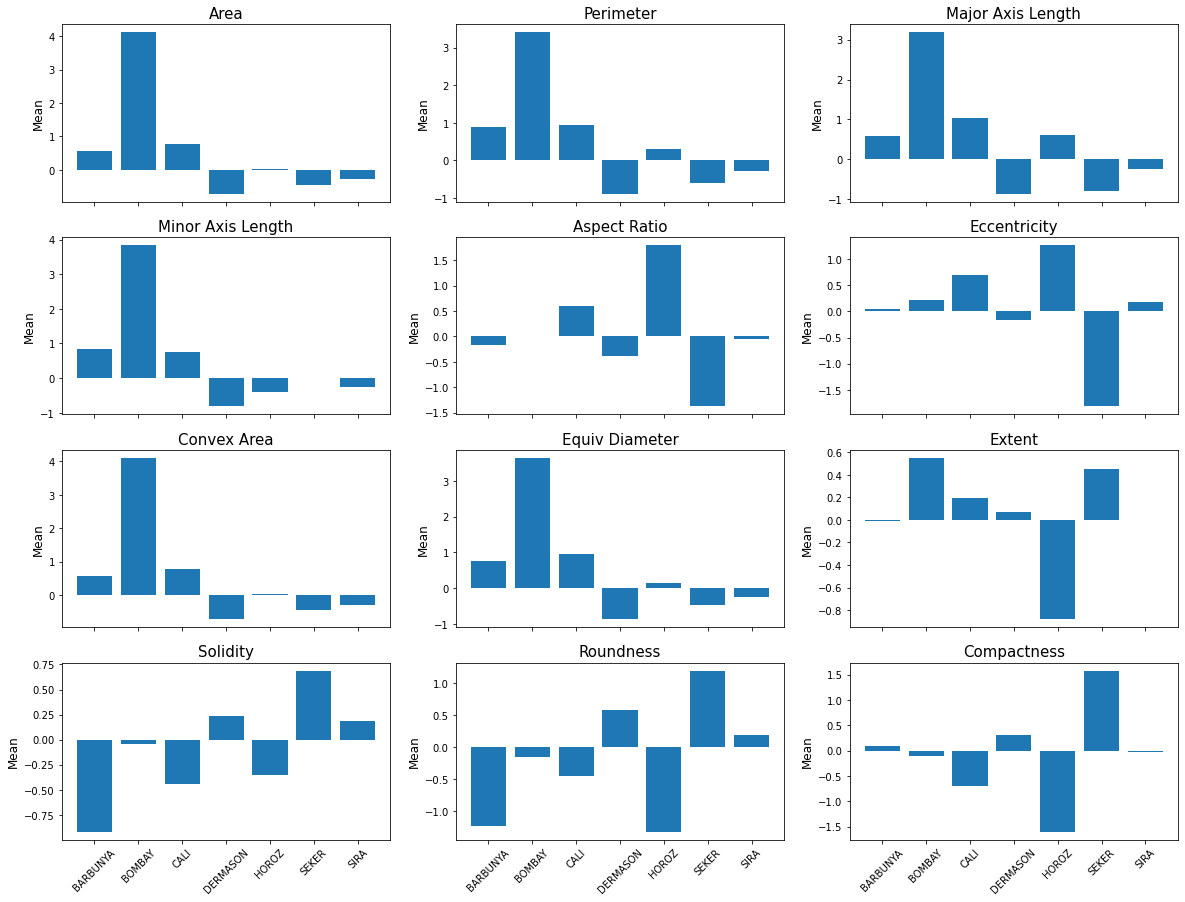

In [128]:
# Set up figure size
plt.rcParams['figure.figsize'] = (20, 15)

# Make subplots
fig, axes = plt.subplots(nrows=4, ncols=3, sharex='col')

# Set font sizes
title  = 15
yLabel = 12
ticks  = 8
# Set up axes / ticks
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
    plt.ylabel('Mean', fontsize=yLabel)

## PLOT 1 - AREA
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'Area':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'Area':'mean'}).reset_index('Class')['Area']
# Build chart
axes[0, 0].bar(X_Axis, Y_Axis)
axes[0, 0].set_title('Area', fontsize=title)


## PLOT 2 - PERIMETER
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'Perimeter':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'Perimeter':'mean'}).reset_index('Class')['Perimeter']
# Build chart
axes[0, 1].bar(X_Axis, Y_Axis)
axes[0, 1].set_title('Perimeter', fontsize=title)

## PLOT 3 - MAJOR AXIS LENGTH
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'MajorAxisLength':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'MajorAxisLength':'mean'}).reset_index('Class')['MajorAxisLength']
# Build chart
axes[0, 2].bar(X_Axis, Y_Axis)
axes[0, 2].set_title('Major Axis Length', fontsize=title)

## PLOT 4 - MINOR AXIS LENGTH
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'MinorAxisLength':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'MinorAxisLength':'mean'}).reset_index('Class')['MinorAxisLength']
# Build chart
axes[1, 0].bar(X_Axis, Y_Axis)
axes[1, 0].set_title('Minor Axis Length', fontsize=title)

## PLOT 5 - ASPECT RATIO
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'AspectRation':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'AspectRation':'mean'}).reset_index('Class')['AspectRation']
# Build chart
axes[1, 1].bar(X_Axis, Y_Axis)
axes[1, 1].set_title('Aspect Ratio', fontsize=title)

## PLOT 6 - ECCENTRICITY
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'Eccentricity':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'Eccentricity':'mean'}).reset_index('Class')['Eccentricity']
# Build chart
axes[1, 2].bar(X_Axis, Y_Axis)
axes[1, 2].set_title('Eccentricity', fontsize=title)

## PLOT 7 - CONVEX AREA
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'ConvexArea':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'ConvexArea':'mean'}).reset_index('Class')['ConvexArea']
# Build chart
axes[2, 0].bar(X_Axis, Y_Axis)
axes[2, 0].set_title('Convex Area', fontsize=title)

## PLOT 8 - EQUIV DIAMETER
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'EquivDiameter':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'EquivDiameter':'mean'}).reset_index('Class')['EquivDiameter']
# Build chart
axes[2, 1].bar(X_Axis, Y_Axis)
axes[2, 1].set_title('Equiv Diameter', fontsize=title)

## PLOT 9 - EXTENT
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'Extent':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'Extent':'mean'}).reset_index('Class')['Extent']
# Build chart
axes[2, 2].bar(X_Axis, Y_Axis)
axes[2, 2].set_title('Extent', fontsize=title)

## PLOT 10 - SOLIDITY
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'Solidity':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'Solidity':'mean'}).reset_index('Class')['Solidity']
# Build chart
axes[3, 0].bar(X_Axis, Y_Axis)
axes[3, 0].set_title('Solidity', fontsize=title)

## PLOT 11 - ROUNDNESS
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'roundness':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'roundness':'mean'}).reset_index('Class')['roundness']
# Build chart
axes[3, 1].bar(X_Axis, Y_Axis)
axes[3, 1].set_title('Roundness', fontsize=title)

## PLOT 12 - COMPACTNESS
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'Compactness':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'Compactness':'mean'}).reset_index('Class')['Compactness']
# Build chart
axes[3, 2].bar(X_Axis, Y_Axis)
axes[3, 2].set_title('Compactness', fontsize=title)

plt.show()

### Visualize Average Values for Each Shape Factor by Bean Type

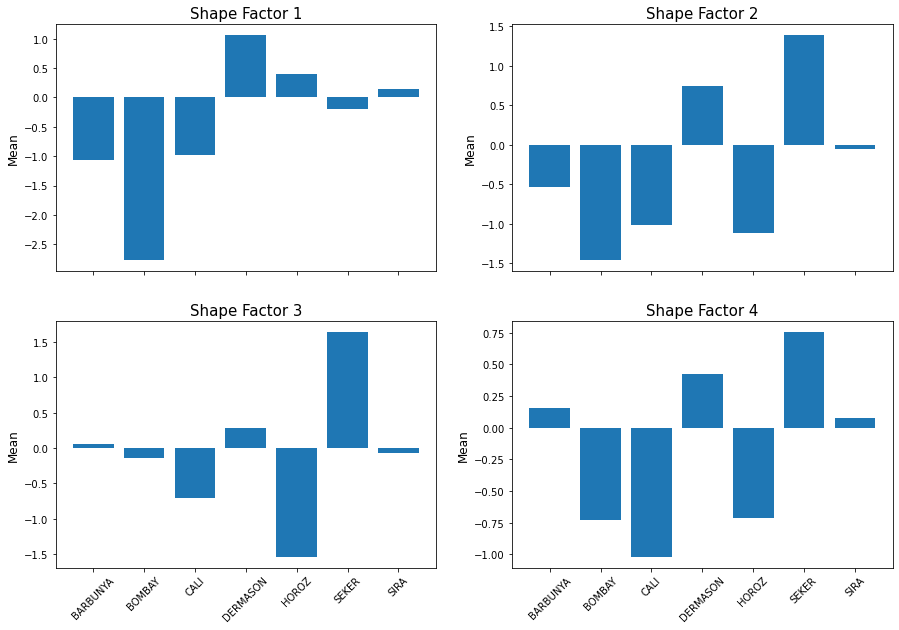

In [129]:
# Set up figure size
plt.rcParams['figure.figsize'] = (15, 10)

# Make subplots
fig, axes = plt.subplots(nrows=2, ncols=2, sharex='col')

# Set font sizes
title  = 15
yLabel = 12
ticks  = 8
# Set up axes / ticks
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
    plt.ylabel('Mean', fontsize=yLabel)

## PLOT 1 - SHAPE FACTOR 1
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'ShapeFactor1':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'ShapeFactor1':'mean'}).reset_index('Class')['ShapeFactor1']
# Build chart
axes[0, 0].bar(X_Axis, Y_Axis)
axes[0, 0].set_title('Shape Factor 1', fontsize=title)

## PLOT 2 - SHAPE FACTOR 2
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'ShapeFactor2':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'ShapeFactor2':'mean'}).reset_index('Class')['ShapeFactor2']
# Build chart
axes[0, 1].bar(X_Axis, Y_Axis)
axes[0, 1].set_title('Shape Factor 2', fontsize=title)

## PLOT 4 - SHAPE FACTOR 3
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'ShapeFactor3':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'ShapeFactor3':'mean'}).reset_index('Class')['ShapeFactor3']
# Build chart
axes[1, 0].bar(X_Axis, Y_Axis)
axes[1, 0].set_title('Shape Factor 3', fontsize=title)

## PLOT 5 - SHAPE FACTOR 4
# Group by 'Class'
X_Axis = beanDF.groupby('Class').aggregate({'ShapeFactor4':'mean'}).reset_index('Class')['Class']
Y_Axis = beanDF.groupby('Class').aggregate({'ShapeFactor4':'mean'}).reset_index('Class')['ShapeFactor4']
# Build chart
axes[1, 1].bar(X_Axis, Y_Axis)
axes[1, 1].set_title('Shape Factor 4', fontsize=title)

plt.show()